In [5]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import xarray as xr
from typing import Final
import matplotlib.pyplot as plt
from pv_forecast import fourier
plt.rcParams['figure.figsize'] = [20, 10]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
FILENAME: Final[str] = "gs://solar-pv-nowcasting-data/PV/GSP/v5/pv_gsp.zarr"
ds = xr.open_dataset(FILENAME, engine="zarr")
ds

<xarray.Dataset>
Dimensions:                (datetime_gmt: 150865, gsp_id: 318)
Coordinates:
  * datetime_gmt           (datetime_gmt) datetime64[ns] 2014-01-01 ... 2022-...
  * gsp_id                 (gsp_id) int64 0 1 2 3 4 5 ... 313 314 315 316 317
Data variables:
    generation_mw          (datetime_gmt, gsp_id) float64 ...
    installedcapacity_mwp  (datetime_gmt, gsp_id) float64 ...

In [3]:
normalized_power = ds["generation_mw"] / ds["installedcapacity_mwp"]
normalized_power

<xarray.DataArray (datetime_gmt: 150865, gsp_id: 318)>
array([[ 0., nan, nan, ..., nan, nan, nan],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
Coordinates:
  * datetime_gmt  (datetime_gmt) datetime64[ns] 2014-01-01 ... 2022-08-10
  * gsp_id        (gsp_id) int64 0 1 2 3 4 5 6 7 ... 311 312 313 314 315 316 317

In [6]:
%%time
fourier_features = fourier.fourier_encode_date_time(pd.to_datetime(normalized_power.datetime_gmt))

CPU times: user 92.9 ms, sys: 4.55 ms, total: 97.5 ms
Wall time: 96.8 ms


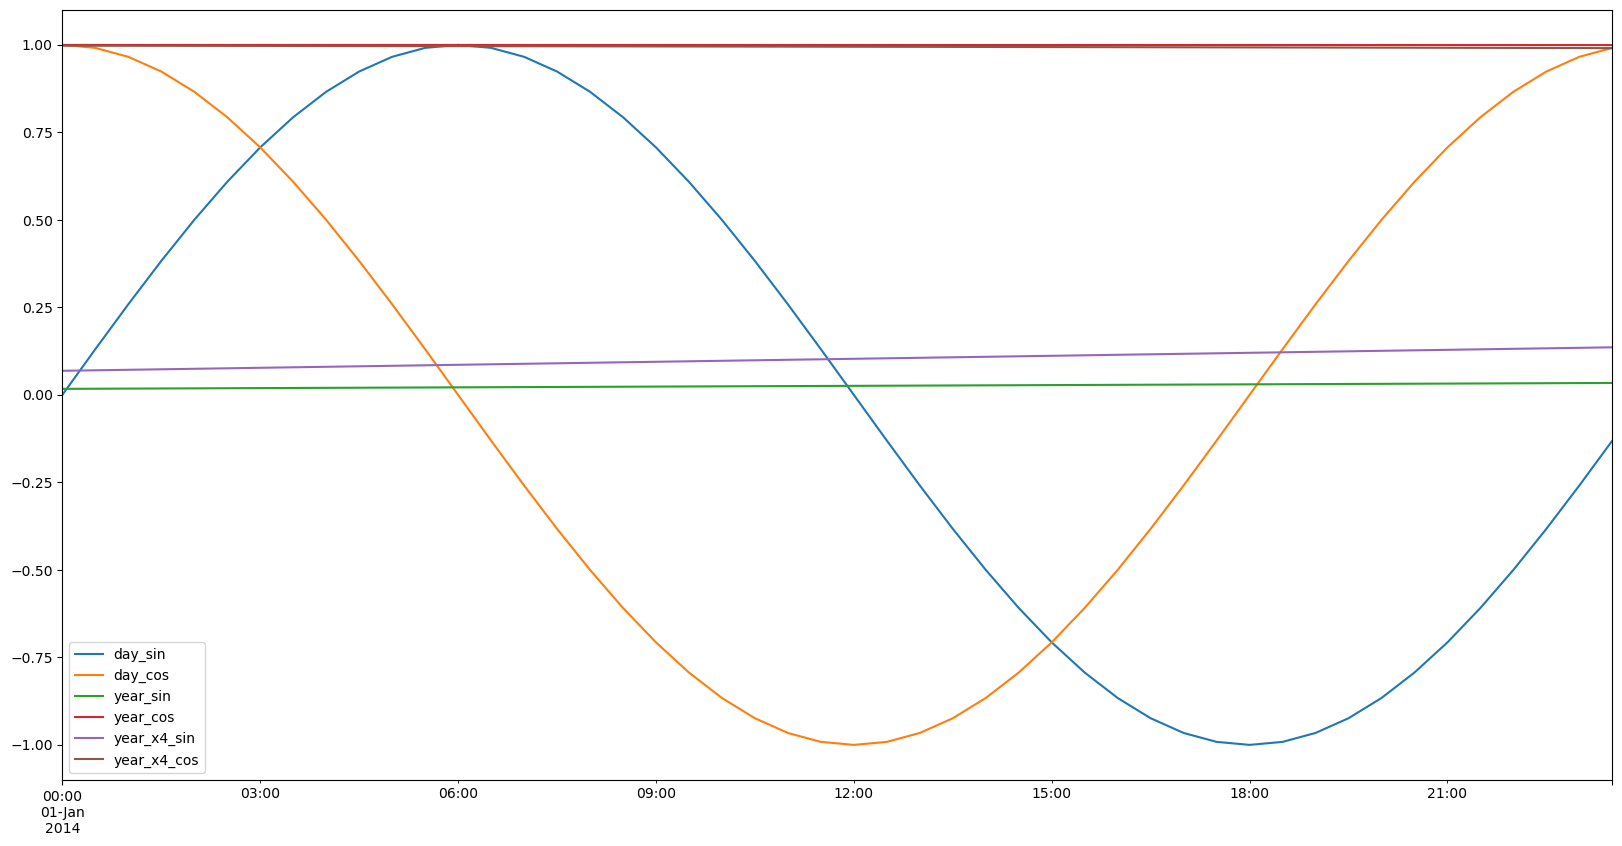

In [7]:
fourier_features["2014-01-01":"2014-01-01"].plot();

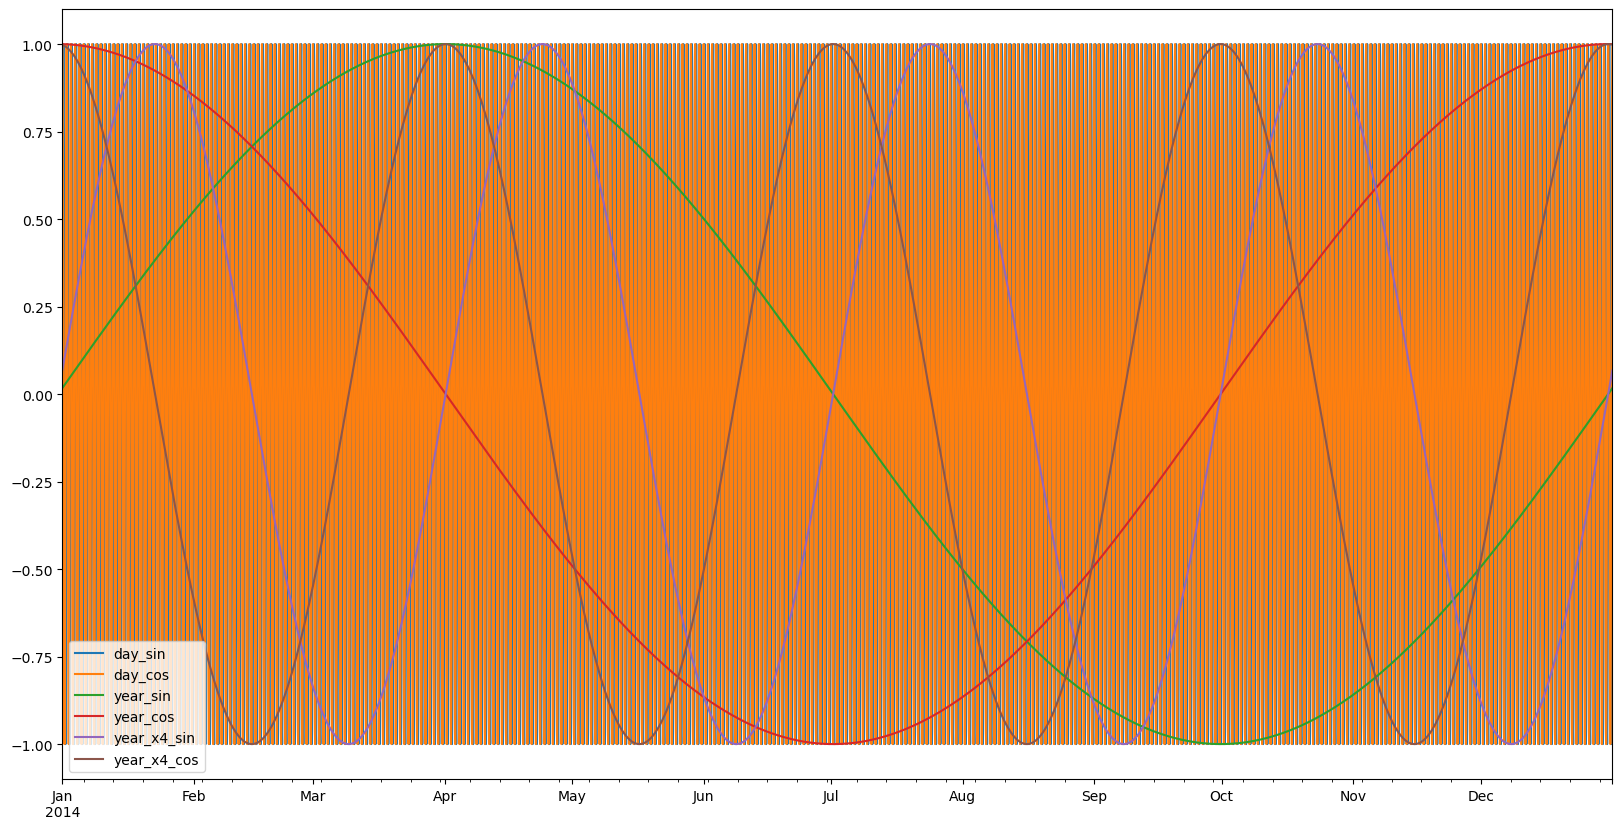

In [8]:
fourier_features["2014-01-01":"2014-12-31"].plot();